## Objectives
#### After completing this analysis, you will be able to:

- Load and preprocess a dataset for data analysis
- Handle missing data using median and mode imputation
- Convert categorical and numerical data types appropriately
- Perform exploratory data analysis (EDA) with summary statistics
- Visualize data distributions using histograms and box plots
- Analyze feature correlations using a heatmap
- Understand the impact of RAM and CPU frequency on laptop prices
- Group data by categorical features and extract insights
- Save cleaned and processed data for further analysis



In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Loading and viewing the Dataset

In [41]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=None)

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


### Assign Column Names

In [43]:
headers = ["Index", "Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
df = df.drop(index=0).reset_index(drop=True)
df.head()

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4.0,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


### Convert Data Types and Handle Missing Values

In [44]:
# Convert data types
df[["Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]] = df[["Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]].astype(float)

# Handle Missing Values
for col in df.columns:
    df[col].fillna(df[col].mode()[0] if df[col].dtype == 'O' else df[col].median(), inplace=True)

### Data Summary

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [45]:
print("Data Overview:")
print(df.info())
print(df.describe())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             238 non-null    float64
 1   Manufacturer      238 non-null    object 
 2   Category          238 non-null    object 
 3   Screen            238 non-null    object 
 4   GPU               238 non-null    object 
 5   OS                238 non-null    object 
 6   CPU_core          238 non-null    object 
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    float64
 10  Storage_GB_SSD    238 non-null    float64
 11  Weight_kg         238 non-null    float64
 12  Price             238 non-null    float64
dtypes: float64(7), object(6)
memory usage: 24.3+ KB
None
            Index  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000 

Rounding screen_size_inch values to 2 decimals

In [46]:
df[['Screen_Size_inch']] = np.round(df[['Screen_Size_inch']],2)
df.head()

,Index,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8.0,256.0,1.60,978.0
1,1.0,Dell,3,Full HD,1,1,3,39.62,2.0,4.0,256.0,2.20,634.0
2,2.0,Dell,3,Full HD,1,1,7,39.62,2.7,8.0,256.0,2.20,946.0
3,3.0,Dell,4,IPS Panel,2,1,5,33.78,1.6,8.0,128.0,1.22,1244.0
4,4.0,HP,4,Full HD,2,1,7,39.62,1.8,8.0,256.0,1.91,837.0


### Evaluate the dataset for missing data

In [62]:
missing_data = df.isnull()
missing_data.head()
for column in missing_data.columns.values.tolist():
   print(column)
   print (missing_data[column].value_counts())
   print("")   


Index
False    238
Name: Index, dtype: int64

Manufacturer
False    238
Name: Manufacturer, dtype: int64

Category
False    238
Name: Category, dtype: int64

Screen
False    238
Name: Screen, dtype: int64

GPU
False    238
Name: GPU, dtype: int64

OS
False    238
Name: OS, dtype: int64

CPU_core
False    238
Name: CPU_core, dtype: int64

Screen_Size_inch
True    238
Name: Screen_Size_inch, dtype: int64

CPU_frequency
False    238
Name: CPU_frequency, dtype: int64

RAM_GB
False    238
Name: RAM_GB, dtype: int64

Storage_GB_SSD
False    238
Name: Storage_GB_SSD, dtype: int64

Weight_kg
False    238
Name: Weight_kg, dtype: int64

Price
False    238
Name: Price, dtype: int64



### Replace the missing values in continuos data with mean 

In [48]:
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)


### Replace the missing values in continuos data with the most frequent

In [49]:
common_screen_size = df['Screen_Size_inch'].value_counts().idxmax()
df["Screen_Size_inch"] = df["Screen_Size_inch"].replace(np.nan, common_screen_size, inplace=True)

Fixing the data types
Both "Weight_kg" and "Screen_Size_inch" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.


In [50]:
df[["Weight_kg", "Screen_Size_inch"]] = df[["Weight_kg", "Screen_Size_inch"]].astype("float")
df.dtypes

Index               float64
Manufacturer         object
Category             object
Screen               object
GPU                  object
OS                   object
CPU_core             object
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB              float64
Storage_GB_SSD      float64
Weight_kg           float64
Price               float64
dtype: object

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```


In [25]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_inch"] = df["Screen_Size_inch"]/2.54
df.rename(columns={'Screen_Size_inch':'Screen_Size_inches'}, inplace=True)

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.


In [28]:
# Convert the 'CPU_frequency' column to numeric type
df['CPU_frequency'] = pd.to_numeric(df['CPU_frequency'], errors='coerce')

# Normalize the 'CPU_frequency' column
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".


In [30]:
df["Price"] = df["Price"].astype("float")

In [31]:
Bins = np.linspace(min(df["Price"]),max(df["Price"]),4)
Group_names = ["Low", "Medium" , "High"]
df["Binned"] = pd.cut(df["Price"], Bins, labels=Group_names, include_lowest = True)

Also, plot the bar graph of these bins.


Text(0.5, 1.0, 'Price bins')

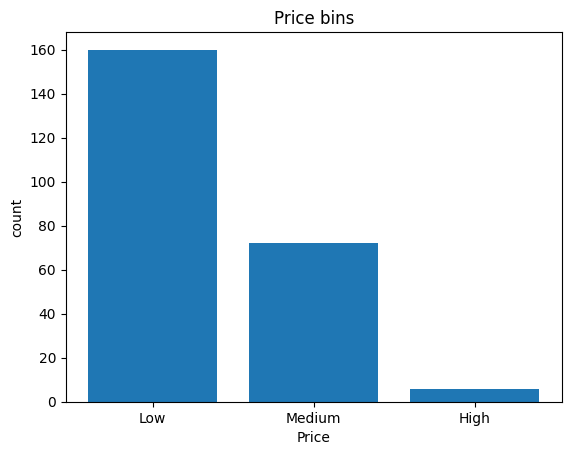

In [34]:
plt.bar(Group_names, df["Binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.


In [35]:

dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

Print the content of dataframe.head() to verify the changes that were made to the dataset.


## Data Visualization
#### Distribution of Laptop prices

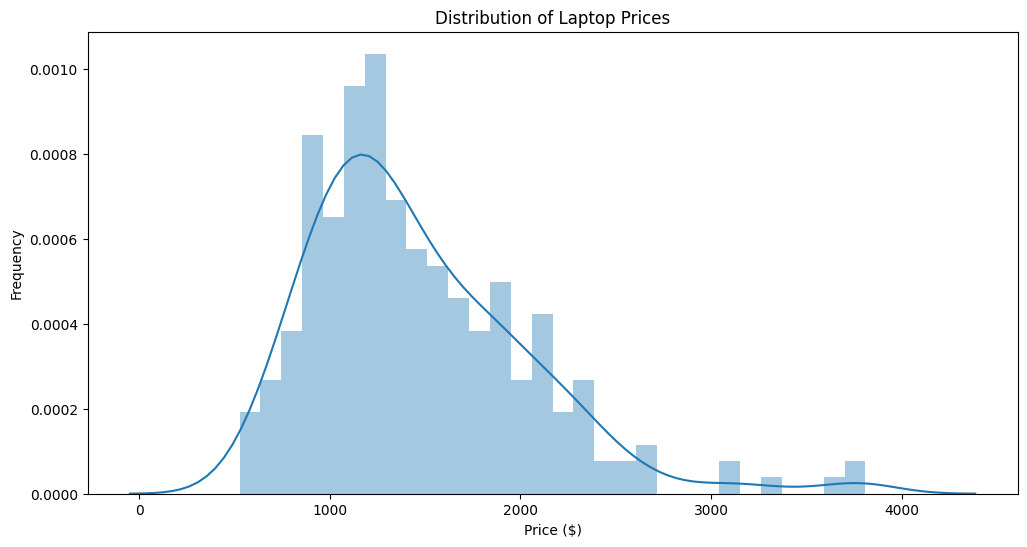

In [59]:
plt.figure(figsize=(12, 6))
sns.distplot(df["Price"], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

#### Key insights of Laptop prices
-	Right-Skewed Distribution
	-	The distribution is positively skewed, meaning most laptops are in the lower price range.
	-	A long tail extends towards the higher price range, indicating a few expensive laptops drive up the maximum price.
-	Most Common Price Range (~$500 - $1500)
	-	The peak (mode) suggests that most laptops are priced between $500 - $1500, which is the most frequent price range.
-	Few High-Priced Laptops (~$2500 and beyond)
	-	There are fewer laptops priced above $2500 - $4000, meaning premium laptops are rare compared to mid-range models.

### Correlation Matrix

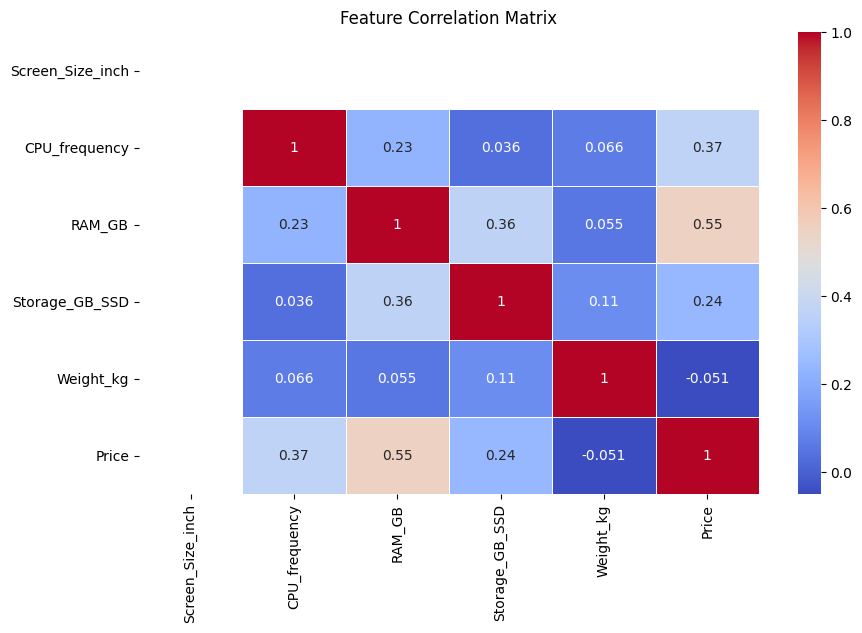

In [60]:
# Correlation Matrix (excluding Index column)
df_corr = df.drop(columns=["Index"]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", linewidths=0.5, xticklabels=df_corr.columns, yticklabels=df_corr.columns)
plt.title("Feature Correlation Matrix")
plt.show()

- Laptop price is strongly influenced by RAM and CPU frequency.
- Storage (SSD) has a weaker correlation with price compared to RAM & CPU frequency. 
- Weight does not impact price significantly (-0.051 correlation).

<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised| --!>


### Price vs RAM 

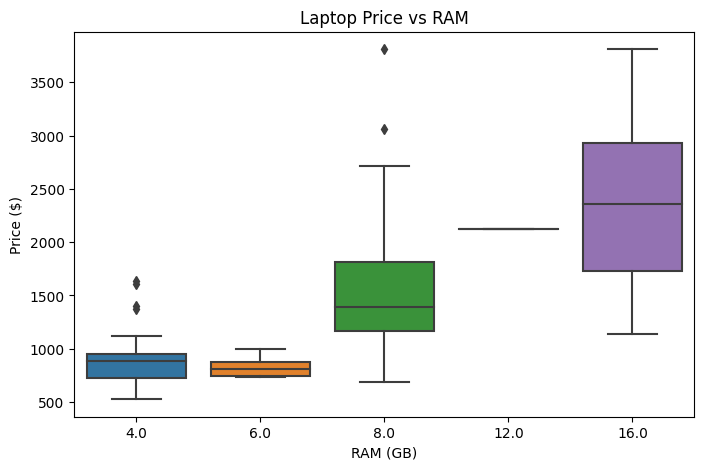

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["RAM_GB"], y=df["Price"])
plt.title("Laptop Price vs RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.show()

### Grouping Data for Insights

In [56]:
price_by_manufacturer = df.groupby("Manufacturer")["Price"].mean().round(2).sort_values()
print("Average Price by Manufacturer:")
print(price_by_manufacturer.to_frame())


Average Price by Manufacturer:
                Price
Manufacturer         
Acer          1067.16
Xiaomi        1188.00
Asus          1327.11
HP            1399.29
MSI           1452.75
Lenovo        1493.10
Dell          1495.08
Toshiba       1703.88
Huawei        1714.00
Samsung       2107.40
Razer         3301.00


## Business Insight:
- Higher RAM laptops tend to have higher prices.
- Some manufacturers have significantly higher average prices than others.
- There is a strong correlation between CPU frequency and laptop price.
